<a href="https://colab.research.google.com/github/harperd/machine-learning/blob/master/notebooks/binary-logistic-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Logistic Regression

Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams.

In [0]:
# NumPy adds support for large, multi-dimensional arrays and matrices, along with a large collection 
# of high-level mathematical functions to operate on these arrays.
import numpy as np

# Matplotlib is a plotting library for the Python programming language and its numerical mathematics 
# extension NumPy. It provides an object-oriented API for embedding plots into applications using 
# general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.
import matplotlib.pyplot as plt

# Allow saving our graphs in the notebook
%matplotlib inline

# Pandas is a software library for data manipulation and analysis. In particular, it offers data 
# structures and operations for manipulating numerical tables and time series.
import pandas as pd

# SciPy optimize provides functions for minimizing (or maximizing) objective 
# functions, possibly subject to constraints. It includes solvers for nonlinear 
# problems (with support for both local and global optimization algorithms), 
# linear programing, constrained and nonlinear least-squares, root finding
# and curve fitting.
import scipy.optimize as opt

## Chart Dark Theme For Google Colab Dark Mode

In [0]:
def set_theme(ax):
  dark_theme = False
  chart_face_color =  '#404040' if dark_theme else '#FFFFFF'
  chart_label_color =  '#FFFFFF' if dark_theme else '#000000'
  
  ax.set_facecolor(chart_face_color)
  ax.spines['bottom'].set_color(chart_label_color)
  ax.spines['top'].set_color(chart_label_color)
  ax.spines['left'].set_color(chart_label_color)
  ax.spines['right'].set_color(chart_label_color)
  ax.xaxis.label.set_color(chart_label_color)
  ax.yaxis.label.set_color(chart_label_color)
  ax.tick_params(axis='x', colors=chart_label_color)
  ax.tick_params(axis='y', colors=chart_label_color)

## Read Sample Data

In [3]:
df_raw = pd.read_csv(
    'https://raw.githubusercontent.com/harperd/machine-learning/master/data/ex2data1.csv',
    header = None,
    names = ['Exam 1', 'Exam 2', 'Admitted'])
%time print(f'{len(df_raw.index):,} rows read.')

100 rows read.
CPU times: user 476 µs, sys: 87 µs, total: 563 µs
Wall time: 475 µs


In [4]:
df_raw.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Plot The Sample Data

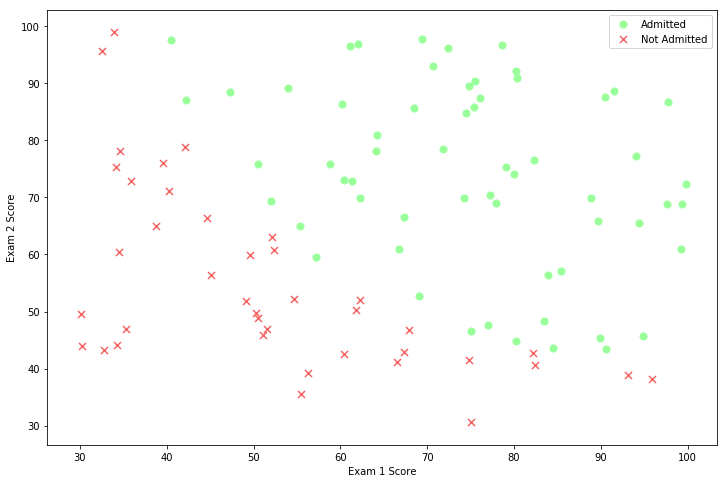

In [5]:
# Get values for positive (admitted) and negative (not admitted).
# We will plot these separately.
positive = df_raw[df_raw['Admitted'].isin([1])]
negative = df_raw[df_raw['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='#99FF99', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='#F66666', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

set_theme(ax)

plt.show()

## Get X, y and Initial Theta Values

In [6]:
df_alt = df_raw.copy()

# add a ones column - this makes the matrix multiplication work out easier
df_alt.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
#cols = data.shape[1]
X = df_alt.iloc[:, 0:3]
y = df_alt.iloc[:, 3:4]

# Note: It is no longer recommended to use np.matrix, even for linear algebra. 
# Instead use regular arrays. The class may be removed in the future.
X = np.array(X.values) # 2D array
y = np.array(y.values) # 2D array
theta = np.array(np.zeros(3), ndmin = 2) # 2D array

X.shape, theta.shape, y.shape

((100, 3), (1, 3), (100, 1))

## Create Functions

### Create The SIgmoid Function


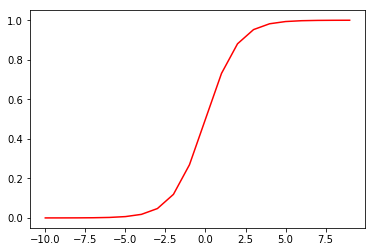

In [7]:
def sigmoid(z):
  return 1 / ( 1 + np.exp(-z) )

nums = np.arange(-10, 10, step = 1)

fig, ax = plt.subplots()
ax.plot(nums, sigmoid(nums), 'r')

set_theme(ax)

plt.show()

### Create a Function for Computing a Hypothesis

In [0]:
def compute_hypothesis(theta, X):
  # Compute our hypothesis
  z = X @ theta.T

  # Scale our hypothesis using Sigmoid
  # Here, if the parameter is zero then the sigmoid value will be 0.5.
  h = sigmoid(z)
  
  return h

### Create a Function for Computing Cost

In [9]:
def compute_cost(theta, X, y):
  theta = np.array(theta, ndmin = 2)
  X = np.array(X, ndmin = 2)
  y = np.array(y, ndmin = 2)

  # Compute our hypothesis
  h = compute_hypothesis(theta, X)
    
  first = np.log(h) * -y
  second = np.log(1 - h) * (1 - y)

  # The number of examples
  m = len(y)
  
  return np.sum(first - second) / m

cost = compute_cost(theta, X, y)
print(f'Cost = {cost}')

Cost = 0.6931471805599453


### Create Function for Computing a Single Gradient

In [10]:
def compute_gradient(theta, X, y):
  theta = np.array(theta, ndmin = 2)
  X = np.array(X, ndmin = 2)
  y = np.array(y, ndmin = 2)
  
  # Compute our hypothesis
  h = compute_hypothesis(theta, X)
    
  # Get the error
  error = h - y

  # The number of examples
  m = len(y)

  # Calculate the gradient
  gradient = ( error.T @ X ) / m

  return gradient
  
compute_gradient(theta, X, y)

array([[ -0.1       , -12.00921659, -11.26284221]])

## Minimize Theta Values

In [11]:
# Minimize a function with variables subject to bounds,
# using gradient information using truncated Newton or Newton Conjugate-Gradient.
result = opt.fmin_tnc(
  # Initial guess.
  x0 = theta,
  # Objective function to be minimized.
  func = compute_cost,
  # Gradient of func.
  fprime = compute_gradient,
  # Extra arguments passed to f and fprime.
  args = ( X, y ))

theta_min = result[0]
iterations = result[1]
cost = compute_cost(theta_min, X, y)

print(f'Minimized theta values: {theta_min}')
print(f'Number of iterations: {iterations}')
print(f'Cost: {cost}')

Minimized theta values: [-25.16131878   0.20623159   0.20147149]
Number of iterations: 36
Cost: 0.20349770158947394


## Calculate Model Accuracy

In [12]:
def make_predictions(theta, X):
  # Compute our hypothesis
  h = compute_hypothesis(theta, X)
  
  # print(h)
  
  # Make prediction of 1 or zero based on threshold.
  predictions = [ 1 if x >= 0.5 else 0 for x in h ]

  return predictions

def compute_accuracy(predictions, y):
  # Get the correct predictions where correct is 1 and
  # incorrect is 0.
  correct = [ 
      1 if p_val - y_val == 0 else 0 
      # The purpose of zip() is to map the similar index of multiple 
      # containers so that they can be used just using as single entity.
      for (p_val, y_val) in zip(predictions, y)
  ]
  
  # Calculate the overall accuracy.
  #
  # The map() function returns a list of the results after applying the given
  # function to each item of a given iterable (list, tuple etc.).
  accuracy = round(( sum(correct) / len(correct)) * 100)
  
  return accuracy

predictions = make_predictions(theta_min, X)
accuracy = compute_accuracy(predictions, y)

print(f'Accuracy: {accuracy}%')

Accuracy: 89%


## Plot the Decision Boundary

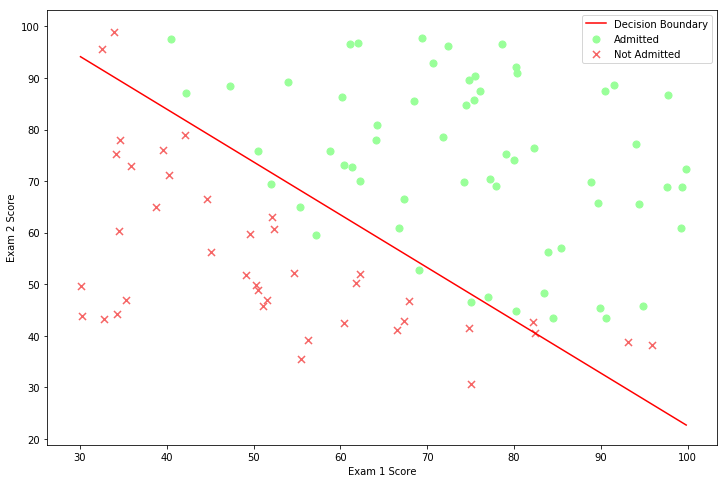

In [30]:
def plot_decision_boundary(theta, df, feature_1, feature_2, classifier, positive_label, negative_label, x_label, y_label):
  # Get x values
  data_range = pd.concat([df[feature_1], df[feature_2]])
  x = np.linspace(data_range.min(), data_range.max(), df.shape[0])
  
  # Get y values
  y = ( -1 / theta[2] ) * (( theta[1] * x ) + theta[0] )
  
  # Get values for positive and negative.
  # We will plot these separately.
  positive = df[df[classifier].isin([1])]
  negative = df[df[classifier].isin([0])]

  fig, ax = plt.subplots(figsize = ( 12, 8 ))
  
  ax.scatter(positive[feature_1], positive[feature_2], s=50, c='#99FF99', marker='o', label=positive_label)
  ax.scatter(negative[feature_1], negative[feature_2], s=50, c='#F66666', marker='x', label=negative_label)
  
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)

  ax.plot(x, y, 'r', label = 'Decision Boundary')
  ax.legend()
  
  set_theme(ax)

plot_decision_boundary(
  theta          = theta_min,
  df             = df_raw,
  feature_1      = 'Exam 1',
  feature_2      = 'Exam 2',
  classifier     = 'Admitted',
  positive_label = 'Admitted',
  negative_label = 'Not Admitted',
  x_label        = 'Exam 1 Score',
  y_label        = 'Exam 2 Score'
)

## Make a Prediction